In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from ROOT import TFile, TChain, TTree, TCanvas
from PMTAnalysisTools import PMT, Ophit, Flash, Event

Welcome to JupyROOT 6.22/08


In [2]:
filepath = "./pmt_data/" #for majority trigger or minbias?

geotree                = TChain("flashana/geotree")
eventstree             = TChain("flashana/eventstree")
opflashCryoE_flashtree = TChain("flashana/opflashCryoE_flashtree")
opflashCryoE_ophittree = TChain("flashana/opflashCryoE_ophittree")
opflashCryoW_flashtree = TChain("flashana/opflashCryoW_flashtree")
opflashCryoW_ophittree = TChain("flashana/opflashCryoW_ophittree")


filenames = os.listdir(filepath)
filenames = [filepath+filename for filename in filenames if '.root' in filename]


for filename in filenames:
    geotree.Add(filename)
    eventstree.Add(filename)
    opflashCryoE_flashtree.Add(filename)
    opflashCryoE_ophittree.Add(filename)
    opflashCryoW_flashtree.Add(filename)
    opflashCryoW_ophittree.Add(filename)
    break # for testing purposes

print(geotree.GetEntries())
print(eventstree.GetEntries())
print(opflashCryoE_flashtree.GetEntries())
print(opflashCryoE_ophittree.GetEntries())
print(opflashCryoW_flashtree.GetEntries())
print(opflashCryoW_ophittree.GetEntries())

1
16
8
2354
4
1566


In [3]:
pmts    = {}
events  = {}

for record in geotree:
    for channel in range(len(record.pmt_x)):
        pmts[channel] = PMT((record.pmt_x[channel],
                                record.pmt_y[channel],
                                record.pmt_z[channel]))

for event in eventstree:
    events[event.event]=Event([event.run,
                               event.event,
                               event.timestamp,
                               event.beam_gate_start,
                               event.beam_gate_width,
                               event.beam_type])
    
for flash in opflashCryoE_flashtree:
    _flash = Flash([flash.run,
                    flash.event,
                    flash.timestamp,
                    flash.flash_id,
                    flash.multiplicity,
                    flash.multiplicity_right,
                    flash.multiplicity_left,
                    flash.sum_pe,
                    flash.sum_pe_right,
                    flash.sum_pe_left,
                    flash.flash_time,
                    flash.flash_y,
                    flash.flash_width_y,
                    flash.flash_z,
                    flash.flash_width_z])
    events[flash.event].AddFlash(_flash)


for flash in opflashCryoW_flashtree:
    _flash = Flash([flash.run,
                    flash.event,
                    flash.timestamp,
                    flash.flash_id,
                    flash.multiplicity,
                    flash.multiplicity_right,
                    flash.multiplicity_left,
                    flash.sum_pe,
                    flash.sum_pe_right,
                    flash.sum_pe_left,
                    flash.flash_time,
                    flash.flash_y,
                    flash.flash_width_y,
                    flash.flash_z,
                    flash.flash_width_z])
    events[flash.event].AddFlash(_flash)
    
for ophit in opflashCryoE_ophittree:
    
    _ophit = Ophit([ophit.run,
                    ophit.event,
                    ophit.timestamp,
                    ophit.flash_id,
                    ophit.channel_id,
                    ophit.integral,
                    ophit.amplitude,
                    ophit.start_time,
                    ophit.abs_start_time,
                    ophit.pe,
                    ophit.width,
                    ophit.fast_to_total])
    
    (((events[_ophit.event]).GetFlashes())[_ophit.flash_id]).AddOpHit(_ophit)

for ophit in opflashCryoW_ophittree:
    
    _ophit = Ophit([ophit.run,
                    ophit.event,
                    ophit.timestamp,
                    ophit.flash_id,
                    ophit.channel_id,
                    ophit.integral,
                    ophit.amplitude,
                    ophit.start_time,
                    ophit.abs_start_time,
                    ophit.pe,
                    ophit.width,
                    ophit.fast_to_total])
    (((events[_ophit.event]).GetFlashes())[_ophit.flash_id]).AddOpHit(_ophit)

In [5]:
xavg=[]
for event_number, event in events.items():
    for flash_number, flash in event.GetFlashes().items():
        x = [ophit.GetPosition(pmts)[0] for ophit in flash.GetOpHits()]
        if len(x) != 0:
            xavg.append(sum(x)/len(x))
print(xavg)

[-193.55137782671486, -4.421174522408601, -138.5296220364778, 222.257624539462, -186.65883192756684, 38.62308933829678, -240.55420388869967, -228.77519666231595, 67.59293954858283]


In [7]:
for pmt_id, pmt in pmts.items():
    print(pmt.x)

-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875
-371.07000732421875


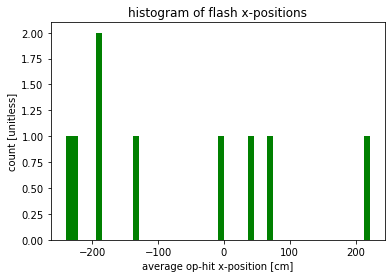

In [8]:
# the histogram of the data
n, bins, patches = plt.hist(xavg, 50, facecolor='g')
plt.ylabel('count [unitless]')
plt.xlabel('average op-hit x-position [cm]')
plt.title('histogram of flash x-positions')
plt.show()